# การแยกข่าวปลอมและข่าวจริง

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from nltk.corpus import stopwords
import string
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import * 
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.decomposition import PCA , TruncatedSVD , NMF
from sklearn.pipeline import Pipeline

In [4]:
true = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true['class'] = 0
fake['class'] = 1

In [7]:
true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [8]:
fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [9]:
df = pd.concat([true.sample(1000) , fake.sample(1000)]).reset_index().drop('index' , axis=1)

In [10]:
df.sample(5)

,title,text,subject,date,class
780,Kerry meets authors of dissenting cable on U.S...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"June 21, 2016",0
1910,"40,000 MA Drug Cases Could Be Thrown Out Beca...",A Massachusetts crime lab scandal could result...,News,"May 8, 2016",1
1564,"MACHETE ATTACKER, Mohamed Barry Was Living In ...",Now we know the reason it took so long for any...,left-news,"Feb 26, 2016",1
729,Senate panel advances Trump's nominee for atto...,WASHINGTON (Reuters) - The U.S. Senate Judicia...,politicsNews,"February 1, 2017",0
1230,MIKE ROWE SENDS A BRUTAL MESSAGE To The Media ...,An electrical contractor wrote to the 54-year-...,politics,"Aug 28, 2016",1


#### title : ชื่อหัวข่าว
#### text : เนื้อหาของข่าว
#### subject : ประเภทของข่าว
#### date : วันที่โพสต์
#### class : 0=ข่าวจริง , 1=ข่าวปลอม

In [11]:
plt.style.use('ggplot')

<AxesSubplot:xlabel='count', ylabel='subject'>

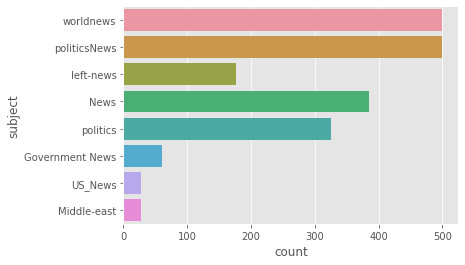

In [12]:
sns.countplot(data=df , y='subject')

**จำนวนข่าว แบ่งตามประเภทข่าว**

In [13]:
order = df[df['class'] == 1]['subject'].value_counts().keys()

Text(0.5, 1.0, 'fake news subject')

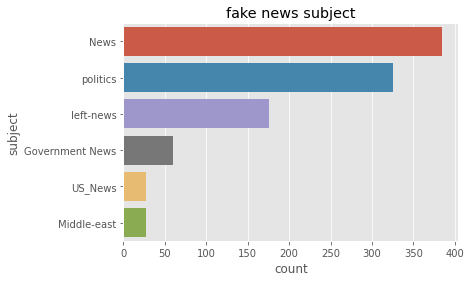

In [14]:
sns.countplot(data=df[df['class'] == 1] , y='subject' , order=order)
plt.title('fake news subject')

**จำนวนข่าวปลอมในแต่ละประเภทข่าว**

In [15]:
df['news'] = df['subject'] + ' ' + df['title'] + ' ' +  df['text']

**นำประเภทข่าว หัวข้อข่าว เนื้อข่าว รวมเข้าด้วยกัน**

In [16]:
def cleaning(text) :
    
    text_clean = ' '.join([i for i in text.split() if i.lower() not in stopwords.words('english')])
    text_clean = ''.join([i for i in text_clean if i not in string.punctuation])
    
    return text_clean

**ทำความสะอาดข้อความ นำอักขระและคำสิ้นเปลืองออกไป**

In [17]:
cleaning(df['news'][0])

'worldnews Gerry Adams Face IRA helped cement Northern Ireland peace DUBLIN Reuters  public face Irish Republican Army bombing campaigns peacemaker mainstream politician Gerry Adams defining figure Northern Ireland 50year journey sectarian torment relative stability Adams announced intention step leader Irish nationalist Sinn Fein party Saturday ultimate goal united Ireland still elusive party leaves dominant Irish nationalist force Britishruled province also strong enough across border Irish Republic chance entering government there too 1970s 80s height IRA bombing campaign end British rule Northern Ireland Sinn Fein operated IRA political wing leader 1983 onwards Adams thus became many Britain Northern Ireland face IRA result loathed proBritish unionists British government lionized equal measure Irish nationalists Yet prospect political progress arose showed ready compromise working late former IRA commander Martin McGuinness swing IRA province Roman Catholic minority behind 1998 dea

In [18]:
df['news_clean'] = df['news'].map(cleaning)

In [19]:
true_split = df[df['class'] == 0]['news_clean'].map(lambda x : x.split())
fake_split = df[df['class'] == 1]['news_clean'].map(lambda x : x.split())

Text(0.5, 1.0, 'Top 10 words in true news')

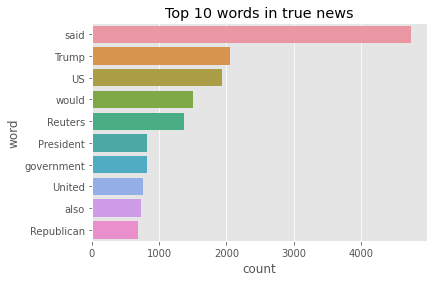

In [20]:
count = Counter()
for i in true_split :
    count.update(i)
    word_count = pd.DataFrame(count.most_common(10) , columns=['word' , 'count'])
sns.barplot(data=word_count , y='word' , x='count')
plt.title('Top 10 words in true news')

**10 คำที่พบมากที่สุดในข่าวจริง**

Text(0.5, 1.0, 'Top 10 words in fake news')

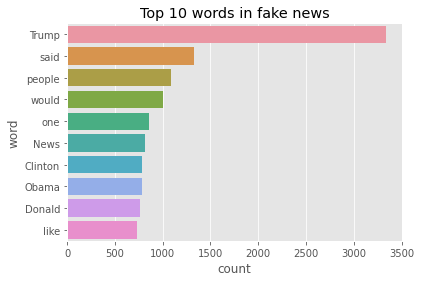

In [21]:
count = Counter()
for i in fake_split :
    count.update(i)
    word_count = pd.DataFrame(count.most_common(10) , columns=['word' , 'count'])
sns.barplot(data=word_count , y='word' , x='count')
plt.title('Top 10 words in fake news')

**10 คำที่พบมากที่สุดในข่าวปลอม**

In [22]:
features = df['news_clean']
target = df['class']

In [23]:
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.2 , random_state=101)

In [24]:
pipe = Pipeline([
    ('vectorizer' , TfidfVectorizer()) , 
    ('model' , LogisticRegression())
])

**ใช้ TfidfVectorizer ตัดคำและนับความถี่**

In [25]:
pipe.fit(x_train , y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [26]:
print('train score =',pipe.score(x_train , y_train))

train score = 0.99125


In [27]:
print('test score =',pipe.score(x_test , y_test))

test score = 0.9575


In [28]:
prediction = pipe.predict(x_test)

In [29]:
print(classification_report(prediction , y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       191
           1       0.94      0.98      0.96       209

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



Text(33.0, 0.5, 'Actuality')

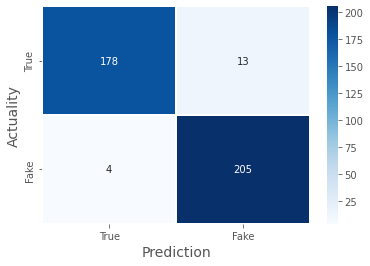

In [30]:
conf = pd.DataFrame(confusion_matrix(prediction , y_test) , columns=['True' , 'Fake'] , index=['True' , 'Fake'])

sns.heatmap(conf , annot=True , fmt='.0f' , linewidths=2 , cmap='Blues')
plt.xlabel('Prediction', fontsize='14')
plt.ylabel('Actuality' , fontsize='14')

**นำโมเดลมาหา parameter ที่เหมาะสมด้วย GridSearchCV**

In [31]:
grid_cv = GridSearchCV(pipe , dict(model__penalty=['l1' , 'l2'] , 
                                  model__C=[0.01,0.1,1,10]) , cv=5 , n_jobs=-1 , verbose=2)

In [32]:
grid_cv.fit(x_train , y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__penalty': ['l1', 'l2']},
             verbose=2)

In [33]:
grid_cv.best_params_

{'model__C': 10, 'model__penalty': 'l2'}

**parameter ที่เหมาะสม**

In [34]:
print('best score =',grid_cv.best_score_)

best score = 0.9774999999999998


**วัดประสิทธิภาพโมเดล**

In [35]:
prediction_2 = grid_cv.best_estimator_.predict(x_test)

In [36]:
print(classification_report(prediction_2 , y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       190
           1       0.95      0.99      0.97       210

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



Text(33.0, 0.5, 'Actuality')

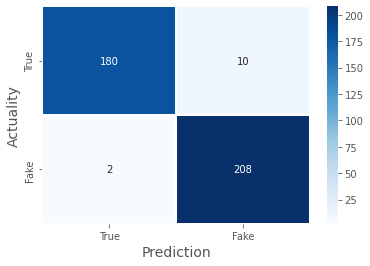

In [37]:
conf_2 = pd.DataFrame(confusion_matrix(prediction_2 , y_test) , columns=['True' , 'Fake'] , index=['True' , 'Fake'])

sns.heatmap(conf_2 , annot=True , fmt='.0f' , linewidths=2 , cmap='Blues')
plt.xlabel('Prediction', fontsize='14')
plt.ylabel('Actuality' , fontsize='14')